In [1]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;
from tqdm import tqdm;
%matplotlib inline

# Tensorflow Notebook
In this notebook, we will program/develop a classification Neural network using keras and tensoflow libraries

<strong>Dataset used: </strong> Cancer dataset

In [2]:
df = pd.read_csv ('./TensorFlow_FILES/DATA/cancer_classification.csv');
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<strong> Target column: </strong> 'benign_0__mal_1'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Text(79.0, 0.5, 'Rows')

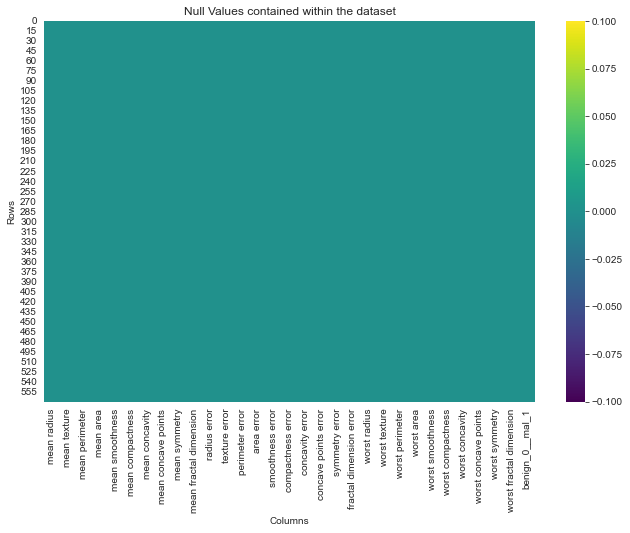

In [4]:
sns.set_style('darkgrid')
plt.figure(figsize = (11, 7))
sns.heatmap(df.isnull(), cmap = 'viridis')
plt.title ('Null Values contained within the dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')

Therefore, there are <strong>no null values</strong> in the dataset

Let's check if it is a balanced dataset or not...

Text(0.5, 1.0, 'A count-based breakdown of the target value')

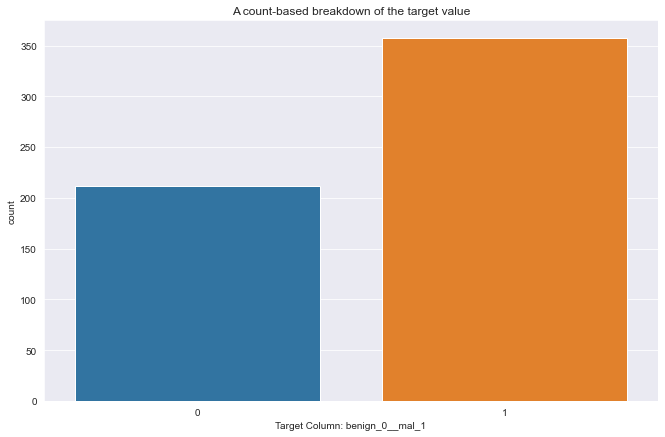

In [5]:
plt.figure(figsize = (11, 7))
sns.countplot(data = df, x= 'benign_0__mal_1')
plt.xlabel('Target Column: benign_0__mal_1')
plt.title('A count-based breakdown of the target value')

seems to have a disparity but overall is well balanced since it's in a 9:14 ratio whereas usually cancer datasets tend to be in 1:10 ratios

<Axes: >

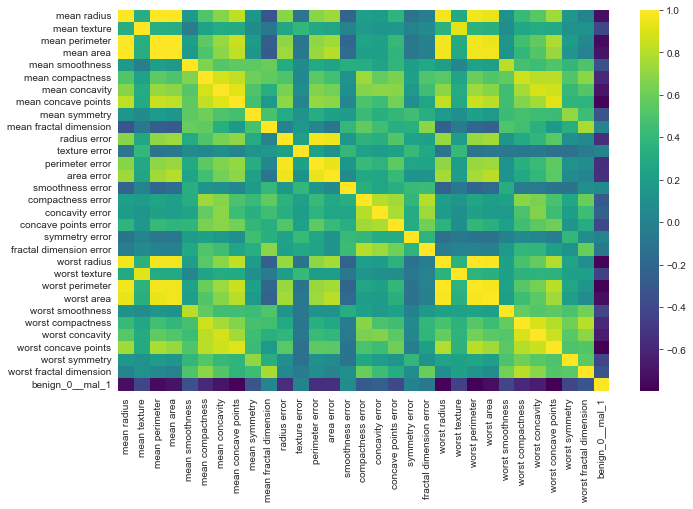

In [6]:
## map out the correlation values for each column in the dataset

plt.figure(figsize = (11, 7))
sns.heatmap(df.corr(), cmap = 'viridis')

<Axes: >

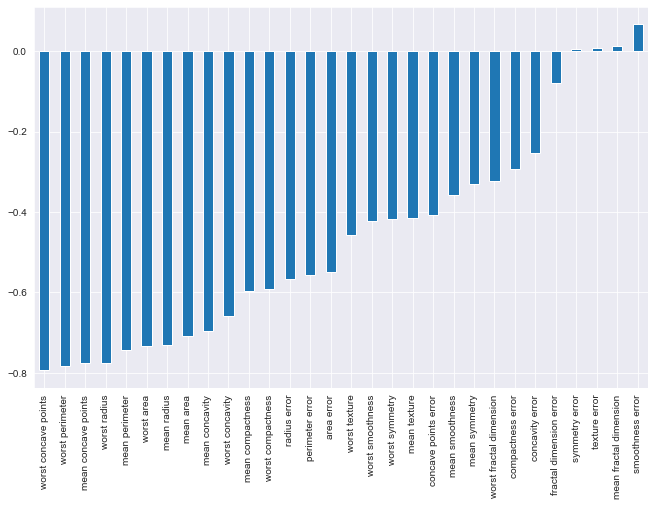

In [7]:
## since there are too many columns in the dataset, 
## let's focus only on the target column

plt.figure(figsize = (11, 7))
df.corr()['benign_0__mal_1'][: -1].sort_values().plot(kind = 'bar')

Let's grab the highly correlated features and drop the weakly correlated ones

In [8]:
cols_strong = list(df.corr()['benign_0__mal_1'][: -1].sort_values()[:-11].index)
cols_strong

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity',
 'worst concavity',
 'mean compactness',
 'worst compactness',
 'radius error',
 'perimeter error',
 'area error',
 'worst texture',
 'worst smoothness',
 'worst symmetry',
 'mean texture']

## Preprocess Dataset for model

In [58]:
#X = df.drop(columns = cols_strong, axis = 1).values
X = df.drop(columns = 'benign_0__mal_1' , axis = 1).values
y = df['benign_0__mal_1'].values

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 101)

In [61]:
from sklearn.preprocessing import MinMaxScaler;
scaler = MinMaxScaler()

In [62]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Construct NN

In [63]:
from tensorflow.keras.models import Sequential

In [64]:
from tensorflow.keras.layers import Dense, Dropout

In [65]:
X_train.shape

(426, 30)

In [66]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

## Because it's a binary class classification, we will use a sigmoid here
model.add(Dense(1, activation = 'sigmoid'))
## compiling...
model.compile (loss = 'binary_crossentropy', optimizer = 'adam')


In [67]:
model.fit(x = X_train_scaled, y = y_train, epochs = 500, validation_data = (X_test_scaled, y_test))

Epoch 1/500
14/14 [==============================] - 1s 20ms/step - loss: 0.6756 - val_loss: 0.6535
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6390 - val_loss: 0.6188
Epoch 3/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6013 - val_loss: 0.5766
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5564 - val_loss: 0.5281
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5082 - val_loss: 0.4763
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4604 - val_loss: 0.4282
Epoch 7/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4143 - val_loss: 0.3822
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3708 - val_loss: 0.3378
Epoch 9/500
14/14 [==============================] - 0s 7ms/step - loss: 0.3315 - val_loss: 0.2992
Epoch 10/500
14/14 [==============================] - 0s 6ms/step - loss: 0.2960 - val_loss: 0.2675
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.0509 - val_loss: 0.1146
Epoch 84/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0522 - val_loss: 0.1097
Epoch 85/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0495 - val_loss: 0.1160
Epoch 86/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0496 - val_loss: 0.1138
Epoch 87/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0496 - val_loss: 0.1113
Epoch 88/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0523 - val_loss: 0.1168
Epoch 89/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0503 - val_loss: 0.1138
Epoch 90/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0497 - val_loss: 0.1203
Epoch 91/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0490 - val_loss: 0.1140
Epoch 92/500
14/14 [==============================] - 0s 7ms/step - loss: 0.0493 - val_loss: 0.1127
Epoch 93/500


14/14 [==============================] - 0s 6ms/step - loss: 0.0400 - val_loss: 0.1311
Epoch 165/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0378 - val_loss: 0.1243
Epoch 166/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0388 - val_loss: 0.1306
Epoch 167/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0459 - val_loss: 0.1232
Epoch 168/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0373 - val_loss: 0.1220
Epoch 169/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0356 - val_loss: 0.1280
Epoch 170/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0368 - val_loss: 0.1226
Epoch 171/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0363 - val_loss: 0.1264
Epoch 172/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0371 - val_loss: 0.1211
Epoch 173/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0364 - val_loss: 0.1261
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0269 - val_loss: 0.1197
Epoch 246/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0268 - val_loss: 0.1225
Epoch 247/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0257 - val_loss: 0.1187
Epoch 248/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0270 - val_loss: 0.1231
Epoch 249/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0264 - val_loss: 0.1179
Epoch 250/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0250 - val_loss: 0.1266
Epoch 251/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.1175
Epoch 252/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0276 - val_loss: 0.1214
Epoch 253/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0261 - val_loss: 0.1232
Epoch 254/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0292 - val_loss: 0.1173
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0183 - val_loss: 0.1239
Epoch 327/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0183 - val_loss: 0.1181
Epoch 328/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.1211
Epoch 329/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0173 - val_loss: 0.1195
Epoch 330/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0188 - val_loss: 0.1193
Epoch 331/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0209 - val_loss: 0.1200
Epoch 332/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0171 - val_loss: 0.1267
Epoch 333/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0175 - val_loss: 0.1214
Epoch 334/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0164 - val_loss: 0.1244
Epoch 335/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0165 - val_loss: 0.1241
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0119 - val_loss: 0.1364
Epoch 408/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.1352
Epoch 409/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0112 - val_loss: 0.1389
Epoch 410/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.1263
Epoch 411/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.1321
Epoch 412/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.1347
Epoch 413/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0114 - val_loss: 0.1353
Epoch 414/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.1433
Epoch 415/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.1359
Epoch 416/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0144 - val_loss: 0.1554
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0072 - val_loss: 0.1513
Epoch 489/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0069 - val_loss: 0.1537
Epoch 490/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0066 - val_loss: 0.1553
Epoch 491/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0067 - val_loss: 0.1509
Epoch 492/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.1505
Epoch 493/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0069 - val_loss: 0.1585
Epoch 494/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.1557
Epoch 495/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.1526
Epoch 496/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.1563
Epoch 497/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0068 - val_loss: 0.1499
Epoc

In [68]:
model_hist = pd.DataFrame(model.history.history)

<Axes: >

<Figure size 792x504 with 0 Axes>

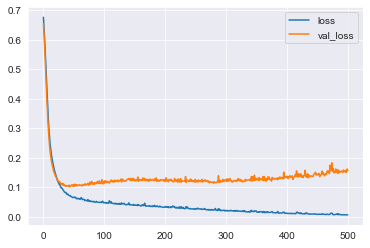

In [69]:
plt.figure(figsize = (11, 7))
model_hist.plot()

The divergence between the validation loss and model loss values is widening, it is clear that the model is overfitting on our training dataset. In order to over come this, we will be implementing an early stop in the training of our model
### Early Stop

In [76]:
from tensorflow.keras.callbacks import EarlyStopping
#help(EarlyStopping)

In [77]:
## we will monitor the *validation loss*, which we will try to *minimize*. 
## We want it to monitor the values about *25 epochs* (i.e. a 5% of total epochs in this case) before coming to a stoo 
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [78]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

## Because it's a binary class classification, we will use a sigmoid here
model.add(Dense(1, activation = 'sigmoid'))
## compiling...
model.compile (loss = 'binary_crossentropy', optimizer = 'adam')


In [79]:
model.fit(x = X_train_scaled, 
          y = y_train, 
          epochs = 500, 
          validation_data = (X_test_scaled, y_test),
          callbacks = [early_stop])

Epoch 1/500
14/14 [==============================] - 1s 22ms/step - loss: 0.6826 - val_loss: 0.6729
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6580 - val_loss: 0.6432
Epoch 3/500
14/14 [==============================] - 0s 7ms/step - loss: 0.6262 - val_loss: 0.6078
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5905 - val_loss: 0.5700
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5484 - val_loss: 0.5251
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4971 - val_loss: 0.4674
Epoch 7/500
14/14 [==============================] - 0s 7ms/step - loss: 0.4433 - val_loss: 0.4122
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3928 - val_loss: 0.3629
Epoch 9/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3487 - val_loss: 0.3204
Epoch 10/500
14/14 [==============================] - 0s 7ms/step - loss: 0.3128 - val_loss: 0.2858
Epoch 11

Text(0, 0.5, 'Loss Values')

<Figure size 792x504 with 0 Axes>

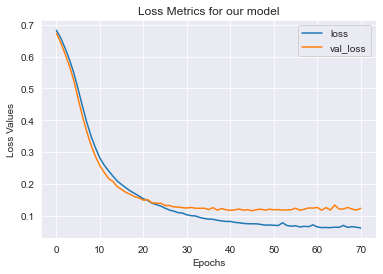

In [81]:
model_hist = pd.DataFrame(model.history.history)
plt.figure(figsize = (11, 7))
model_hist.plot()
plt.title('Loss Metrics for our model')
plt.xlabel('Epochs')
plt.ylabel('Loss Values')

### Adding dropouts to reglularize
<strong>NOTE: </strong> this is not the best regularization technique according to new research; l1 and l2 are better options but we will implement this for simplicity for now...

In [97]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.25))

## Because it's a binary class classification, we will use a sigmoid here
model.add(Dense(1, activation = 'sigmoid'))
## compiling...
model.compile (loss = 'binary_crossentropy', optimizer = 'adam')


In [98]:
model.fit(x = X_train_scaled, 
          y = y_train, 
          epochs = 500, 
          validation_data = (X_test_scaled, y_test),
          callbacks = [early_stop])

Epoch 1/500
14/14 [==============================] - 1s 21ms/step - loss: 0.6853 - val_loss: 0.6632
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6620 - val_loss: 0.6425
Epoch 3/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6384 - val_loss: 0.6165
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6253 - val_loss: 0.5853
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5869 - val_loss: 0.5484
Epoch 6/500
14/14 [==============================] - 0s 7ms/step - loss: 0.5437 - val_loss: 0.4995
Epoch 7/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5021 - val_loss: 0.4526
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4610 - val_loss: 0.4047
Epoch 9/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4166 - val_loss: 0.3580
Epoch 10/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3876 - val_loss: 0.3168
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.0711 - val_loss: 0.0962
Epoch 84/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0643 - val_loss: 0.0948
Epoch 85/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0624 - val_loss: 0.0901
Epoch 86/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0846 - val_loss: 0.0957
Epoch 86: early stopping


Text(0, 0.5, 'Loss Values')

<Figure size 792x504 with 0 Axes>

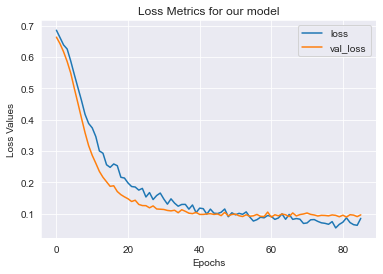

In [99]:
model_hist = pd.DataFrame(model.history.history)
plt.figure(figsize = (11, 7))
model_hist.plot()
plt.title('Loss Metrics for our model')
plt.xlabel('Epochs')
plt.ylabel('Loss Values')

In [103]:
#y_pred = pd.Series(model.predict(X_test_scaled)).apply(lambda x: math.round(x[0] * 0.1))
y_pred = model.predict(X_test_scaled)
y_pred

5/5 [==============================] - 0s 2ms/step


array([[9.88768101e-01],
       [9.90773439e-01],
       [9.94611025e-01],
       [6.26232522e-03],
       [9.99006093e-01],
       [9.98716533e-01],
       [9.99310076e-01],
       [3.60886361e-06],
       [9.96664584e-01],
       [9.97561336e-01],
       [9.97027499e-04],
       [9.94634390e-01],
       [9.51355994e-01],
       [9.98436272e-01],
       [7.48209073e-04],
       [9.98742878e-01],
       [9.95816350e-01],
       [9.98744309e-01],
       [1.12951193e-05],
       [4.88781929e-02],
       [9.67129707e-01],
       [9.96968210e-01],
       [9.88464236e-01],
       [9.98542249e-01],
       [9.20946477e-04],
       [8.96896362e-01],
       [2.61403329e-04],
       [9.99790072e-01],
       [3.10923671e-04],
       [3.51751712e-03],
       [2.70004898e-01],
       [2.58944463e-03],
       [4.62617487e-01],
       [1.86408862e-01],
       [9.99031603e-01],
       [9.99365807e-01],
       [9.23709664e-03],
       [1.69926919e-02],
       [2.34955427e-04],
       [6.98608028e-06],


In [101]:
print ('Confusion Matrix\n', confusion_matrix(y_test, y_pred), '\n')
print ('Classification Report\n', classification_report(y_test, y_pred), '\n')

ValueError: Classification metrics can't handle a mix of binary and continuous targets